<a href="https://colab.research.google.com/github/jyotidabass/YOLO_person-detect/blob/main/YOLO3_4_Py_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Setup
!pip install yolo34py-gpu
!git clone https://github.com/madhawav/YOLO3-4-Py.git
!wget http://absfreepic.com/absolutely_free_photos/original_photos/cars-on-busy-street-3456x2304_73674.jpg
!sh YOLO3-4-Py/tools/download_models.sh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'YOLO3-4-Py' already exists and is not an empty directory.
--2022-06-29 09:18:07--  http://absfreepic.com/absolutely_free_photos/original_photos/cars-on-busy-street-3456x2304_73674.jpg
Resolving absfreepic.com (absfreepic.com)... 107.182.231.252
Connecting to absfreepic.com (absfreepic.com)|107.182.231.252|:80... failed: Connection timed out.
Retrying.

--2022-06-29 09:20:20--  (try: 2)  http://absfreepic.com/absolutely_free_photos/original_photos/cars-on-busy-street-3456x2304_73674.jpg
Connecting to absfreepic.com (absfreepic.com)|107.182.231.252|:80... failed: Connection timed out.
Retrying.

--2022-06-29 09:22:33--  (try: 3)  http://absfreepic.com/absolutely_free_photos/original_photos/cars-on-busy-street-3456x2304_73674.jpg
Connecting to absfreepic.com (absfreepic.com)|107.182.231.252|:80... failed: Connection timed out.
Retrying.

--2022-06-29 09:24:45--  (try

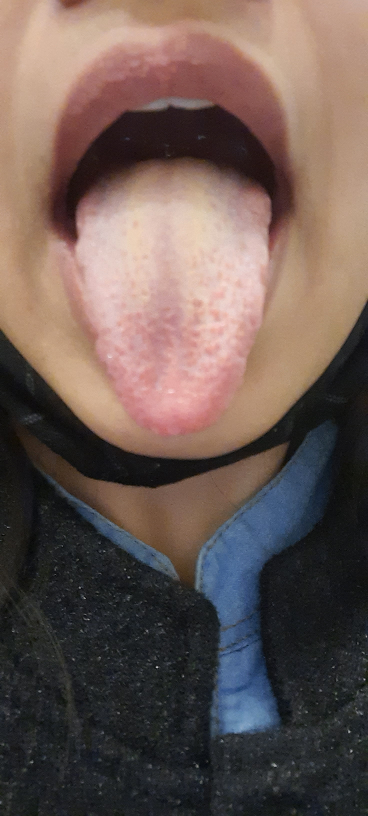

In [18]:
import cv2
img = cv2.imread('/content/tongue - Anubhav Gautam.jpg')
img = cv2.resize(img, None, fx=0.25, fy=0.25)
import PIL
pil_image = PIL.Image.fromarray(img[:,:,::-1])
pil_image

In [19]:
from pydarknet import Detector, Image
net = Detector(bytes("./cfg/yolov3.cfg", encoding="utf-8"), bytes("./weights/yolov3.weights", encoding="utf-8"), 0, bytes("./cfg/coco.data",encoding="utf-8"))

In [20]:
img_darknet = Image(img)
results = net.detect(img_darknet)

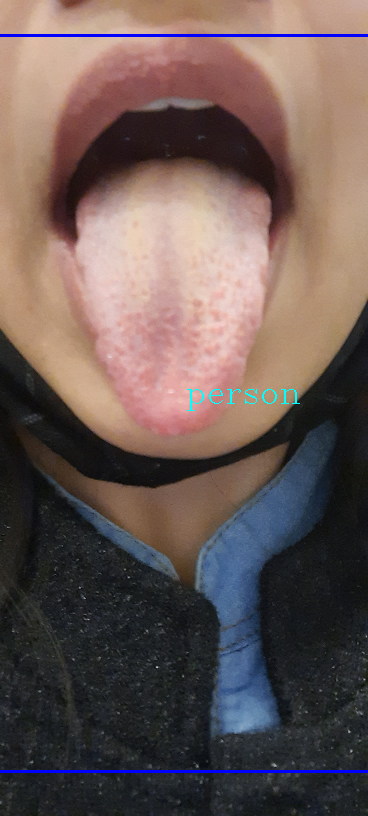

In [21]:
img_output = img.copy()
for category, score, bounds in results:
    x, y, w, h = bounds
    cv2.rectangle(img_output, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (255, 0, 0), thickness=2)
    cv2.putText(img_output, category, (int(x), int(y)), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0))

pil_image_output = PIL.Image.fromarray(img_output[:,:,::-1])
pil_image_output